<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_in_the_works/blob/main/IV_model_inference_works!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

In [1]:
from icevision.all import *


INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

made new folder in /content

uploaded pilot files
5 scissors, 5 scalpels

In [2]:
!ls for_pilot_5_5

ls: cannot access 'for_pilot_5_5': No such file or directory


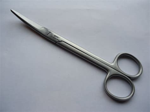

In [5]:
image_path = 'for_pilot_5_5'

img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[1])
img.to_thumb(150,150)

In [6]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)
# 80 + background

81

In [7]:
from icevision.models.checkpoint import *

In [15]:
selection = 0

extra_args = {}

if selection == 0:
  model_type = models.mmdet.retinanet
  backbone = model_type.backbones.resnet50_fpn_1x

elif selection == 1:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 2:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 3:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.retinanet' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/retinanet/__init__.py'>,
 {})

In [16]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map), **extra_args) 


  0%|          | 0/152149505 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader


In [17]:
backbone.__dict__

# filename diff on website, file down/uploaded
#retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.10.0/configs/retinanet/retinanet_r50_fpn_1x_coco.py'),
 'model_name': 'retinanet',
 'pretrained': True,
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth'}

In [18]:
model.eval()

image_path = 'for_pilot_5_5'

img_files = get_image_files(image_path)

imgs_array = [PIL.Image.open(file) for file in img_files]

img_size = 460
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)

In [19]:
imgs_array

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33F99D9CD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33F99D9B90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33F99D9950>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x389 at 0x7F33F99D97D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33F99D9650>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33F9A74950>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x409 at 0x7F33F9A371D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33F9A373D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F33F9A375D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F33F9A37790>]

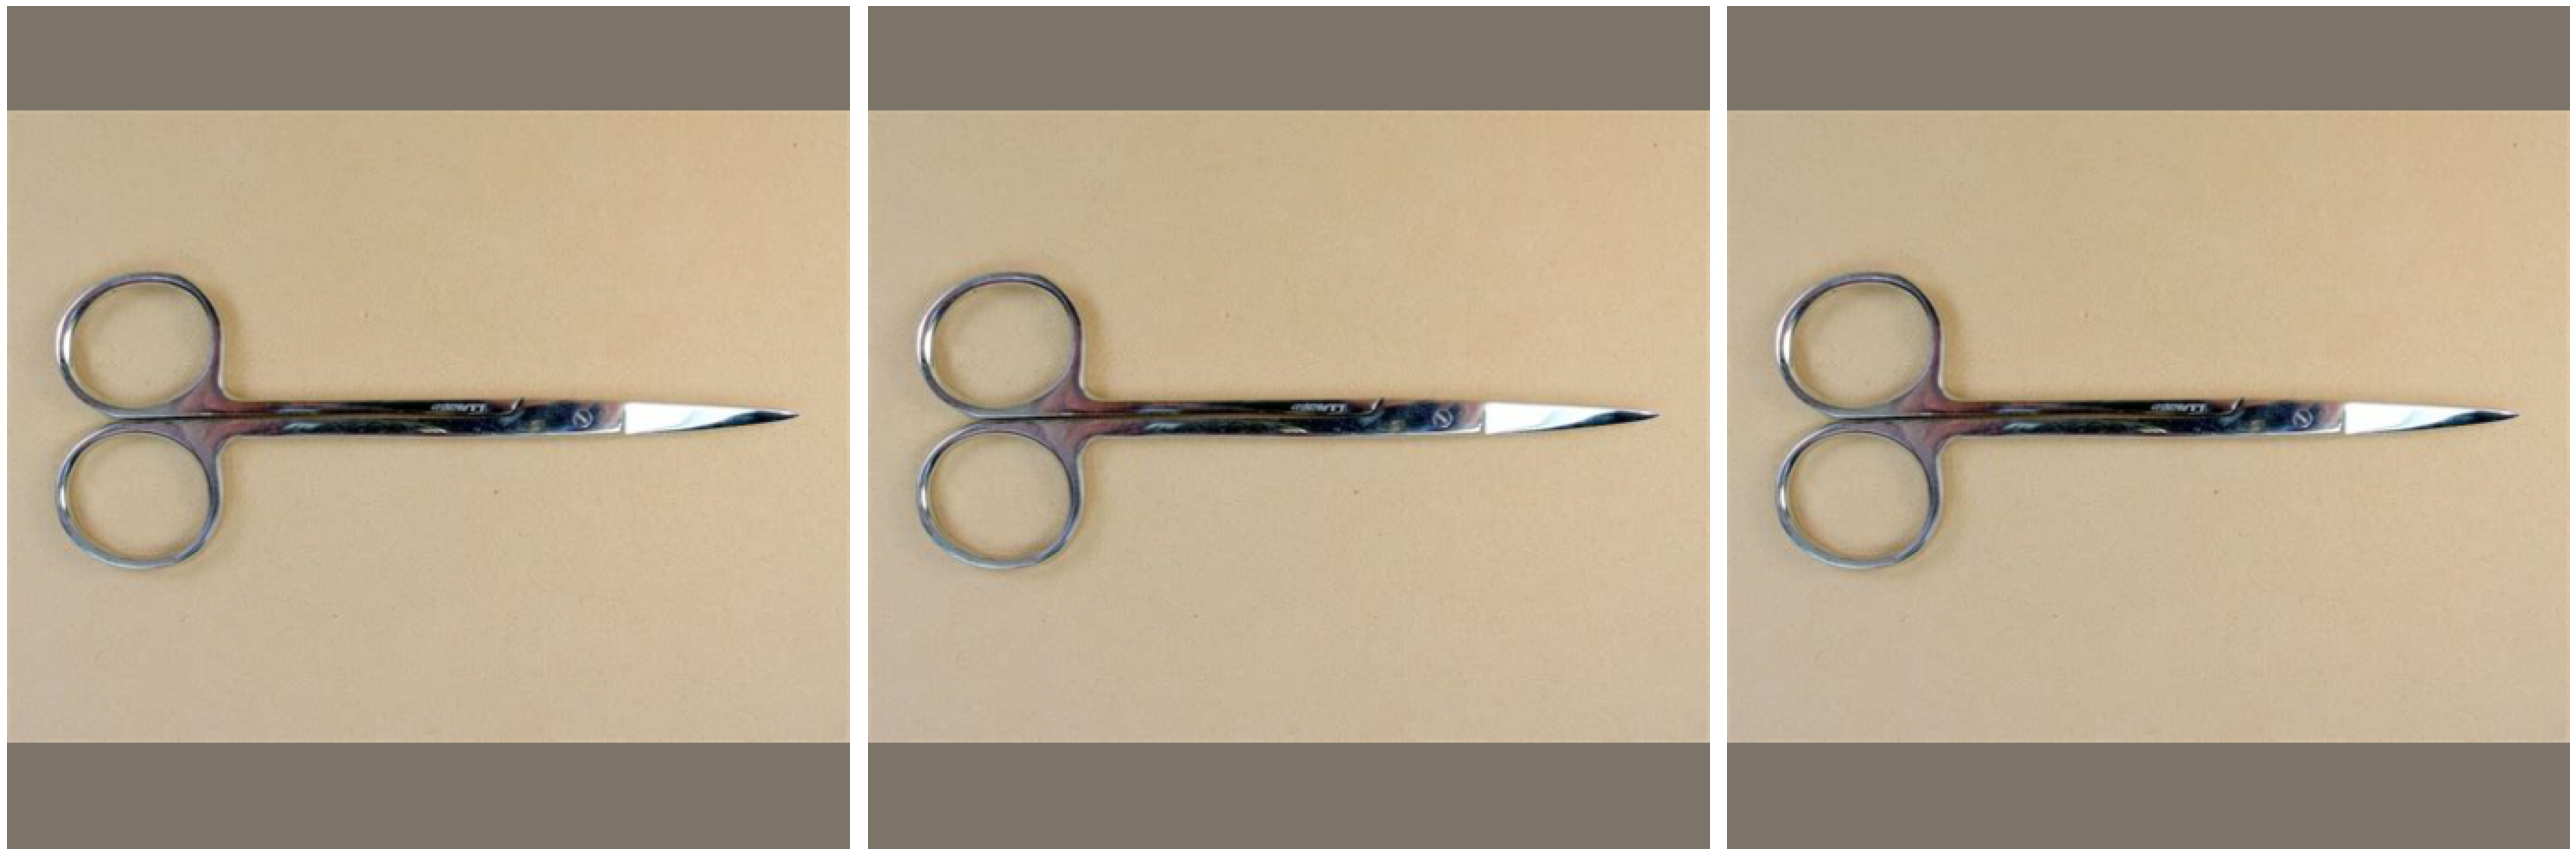

In [67]:
samples = [infer_ds[0] for _ in range(3)]
show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [20]:
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl, keep_images=True)
#when used vfnet: RuntimeError: DeformConv is not implemented on CPU
## same error even on GPU

  0%|          | 0/3 [00:00<?, ?it/s]

In [69]:
preds_saved

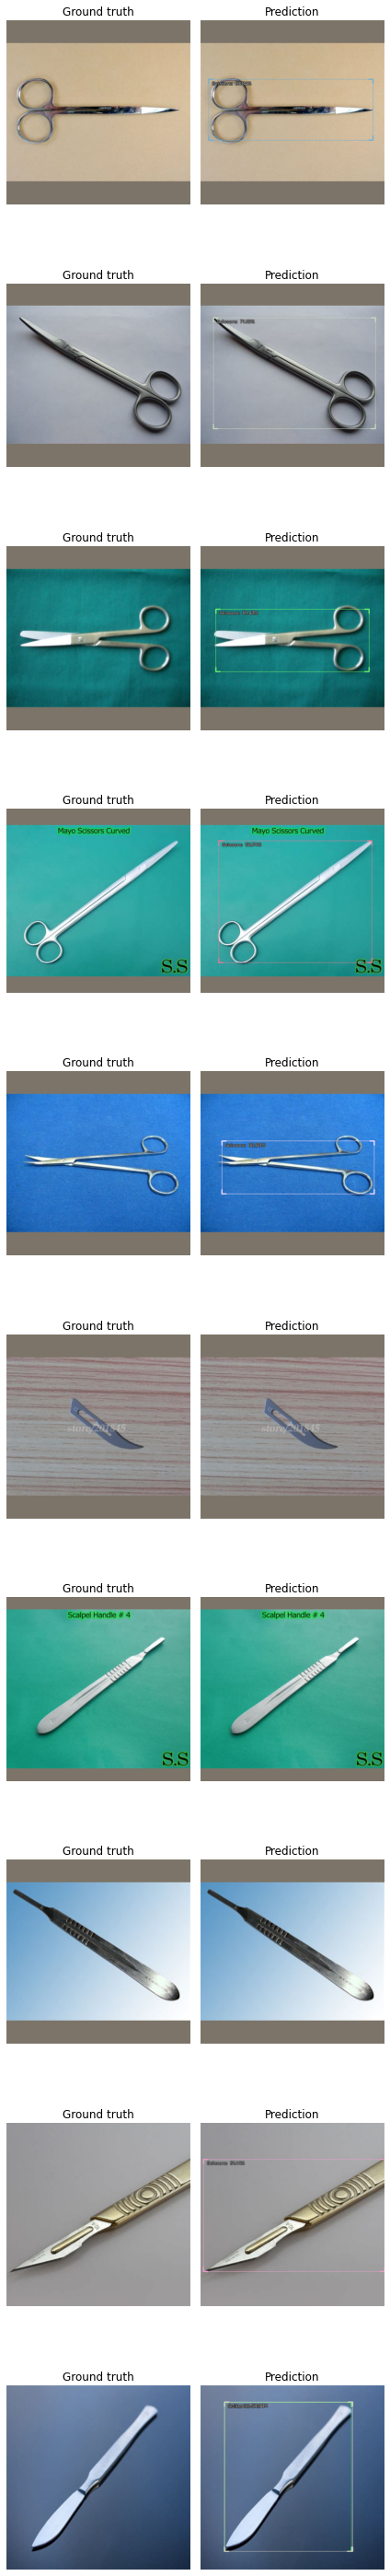

In [21]:
show_preds(preds_saved)
## no bbox, classif when weights not placed

## using retinanet, with bboxes on most scissors and a few knives

In [ ]:
checkpoint_path = '/content/retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth'

checkpoint_and_model = model_from_checkpoint(checkpoint_path)

##TypeError: argument of type 'NoneType' is not iterable

created new pilot set total of 

10 different scissors and scissor-like instruments

10 scalpels, including just holders and blades

included multiple objects in an image

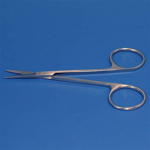

In [23]:
image_path = 'for_pilot_10_10'

img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[1])
img.to_thumb(150,150)

In [24]:
model.eval()

image_path = 'for_pilot_10_10'

img_files = get_image_files(image_path)

imgs_array = [PIL.Image.open(file) for file in img_files]

img_size = 460
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)

In [25]:
imgs_array

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x305 at 0x7F33ED9A2DD0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F33ED9A2950>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x308 at 0x7F33ED9A2B90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33ED9D8890>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33ED9A7A90>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x176 at 0x7F33ED9A7110>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x155 at 0x7F33ED9A7210>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x355 at 0x7F33ED9A7C50>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F33ED9E68D0>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F33ED9E6C10>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=452x378 at 0x7F33ED978250>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x232 at 0x7F33ED9

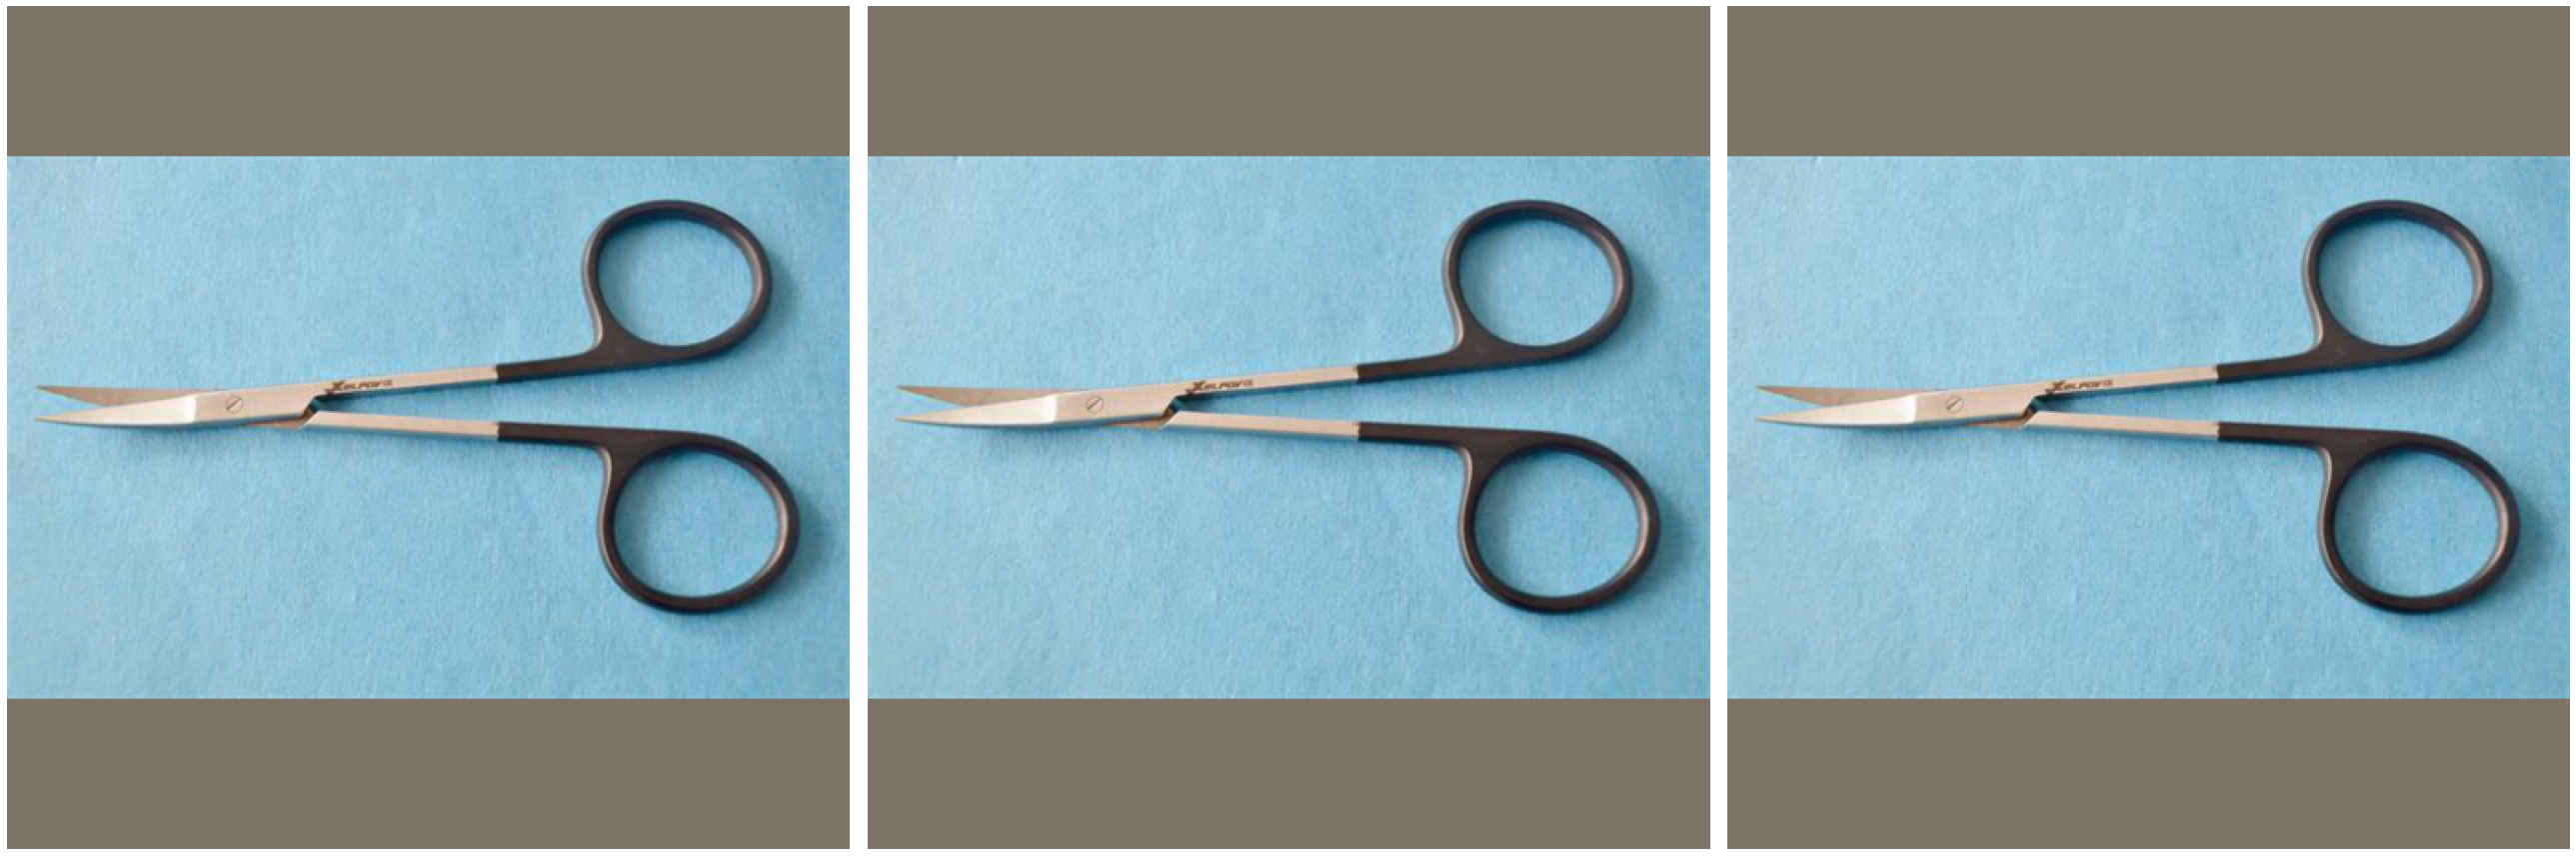

In [26]:
samples = [infer_ds[0] for _ in range(3)]
show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [27]:
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl, keep_images=True)

  0%|          | 0/5 [00:00<?, ?it/s]

In [28]:
preds_saved

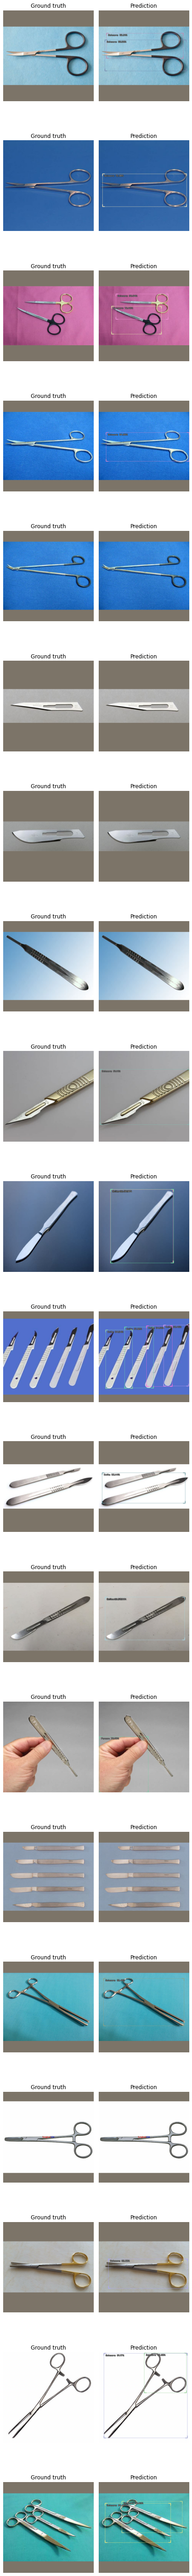

In [29]:
show_preds(preds_saved)

In [ ]:
## predicts scissors well
## flase positive scissor prediction for clamps
## difficulty predicitng potts scissors

## difficulty predicting multiple knives, as well as separates

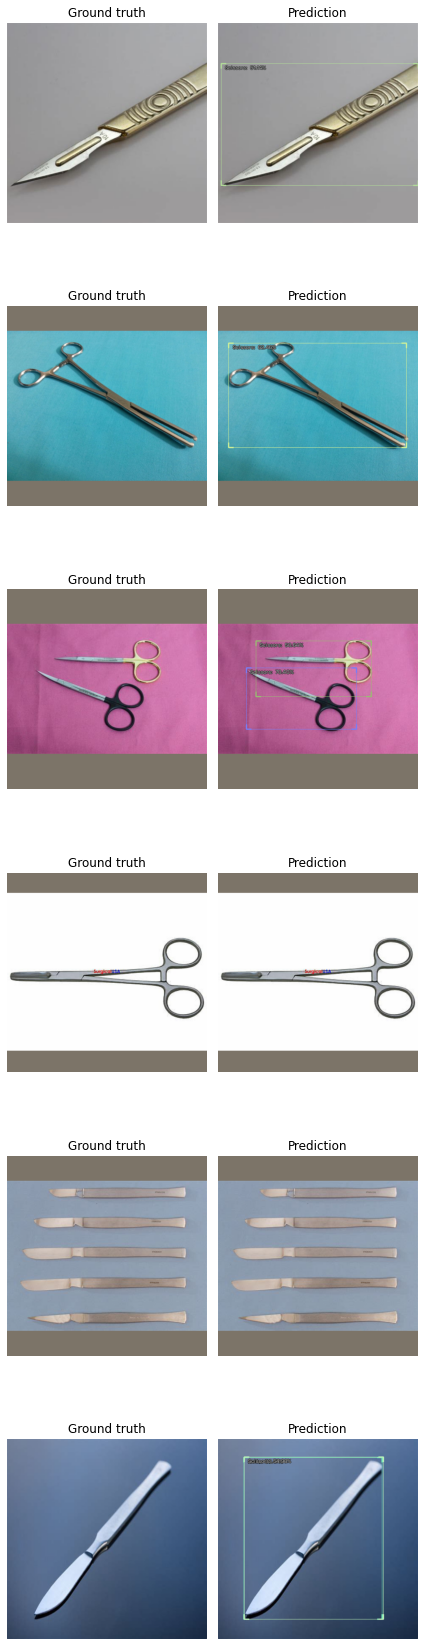

In [32]:
model_type.show_results(model, infer_ds, detection_threshold=0.5)

In [35]:
preds_saved[0].pred

BaseRecord

common: 
	- Image size ImgSize(width=460, height=460)
	- Img: 460x460x3 <np.ndarray> Image
	- Record ID: 0
detection: 
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'pizza': 54, 'donut': 55, 'cake': 56, 'chair': 57, 

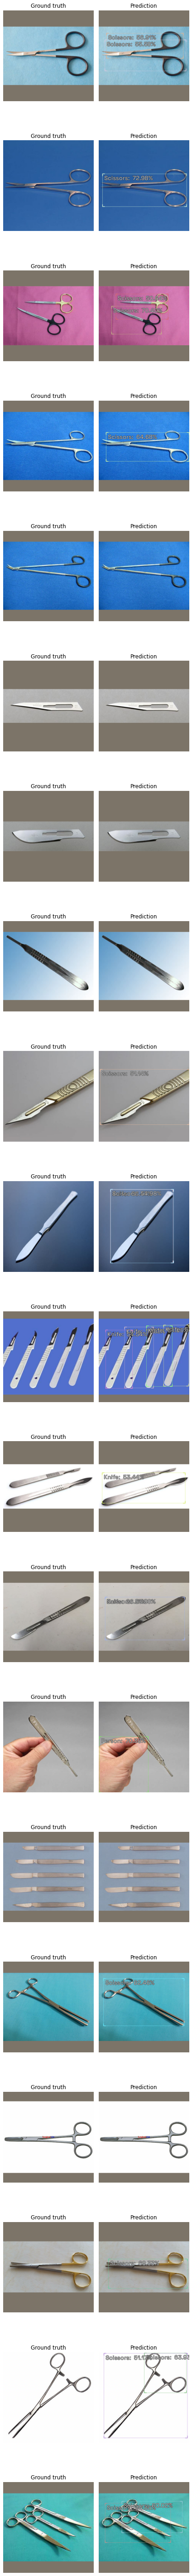

In [42]:
show_preds(preds_saved, font_size=30)
## need better labelling